<a href="https://colab.research.google.com/github/23f2004341/medical-assistor/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

df = pd.read_csv('/content/Week1_GA_dataset.csv')
display(df.head())

,Date,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Face
0,2009-01-02,2009,Waterbury,111440.0,185000.0,Single Family,Detached House,3,3,996.0,1.025953,South
1,2009-01-02,2009,Bridgeport,124670.0,150000.0,Two Family,Duplex,4,3,1241.0,1.025953,South
2,2009-01-02,2009,Waterbury,55720.0,140000.0,Single Family,Detached House,3,2,910.0,1.025953,South
3,2009-01-02,2009,Bridgeport,4775276.0,272900.0,Single Family,Detached House,3,1,971.0,1.025953,East
4,2009-01-02,2009,Bridgeport,112351.0,210000.0,?,Detached House,3,2,1092.0,1.025953,East


In [2]:
print(df.isnull().sum())

Date                    0
Year                    0
Locality             1253
Estimated Value      1243
Sale Price              0
Property                0
Residential             0
num_rooms               0
num_bathrooms           0
carpet_area          1229
property_tax_rate       0
Face                    0
dtype: int64


In [3]:
for col in ['Locality', 'Estimated Value', 'carpet_area']:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

print(df.isnull().sum())

Date                 0
Year                 0
Locality             0
Estimated Value      0
Sale Price           0
Property             0
Residential          0
num_rooms            0
num_bathrooms        0
carpet_area          0
property_tax_rate    0
Face                 0
dtype: int64


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10000 non-null  object 
 1   Year               10000 non-null  int64  
 2   Locality           10000 non-null  object 
 3   Estimated Value    10000 non-null  float64
 4   Sale Price         10000 non-null  float64
 5   Property           10000 non-null  object 
 6   Residential        10000 non-null  object 
 7   num_rooms          10000 non-null  int64  
 8   num_bathrooms      10000 non-null  int64  
 9   carpet_area        10000 non-null  float64
 10  property_tax_rate  10000 non-null  float64
 11  Face               10000 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 937.6+ KB
None


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               10000 non-null  datetime64[ns]
 1   Year               10000 non-null  int64         
 2   Locality           10000 non-null  object        
 3   Estimated Value    10000 non-null  float64       
 4   Sale Price         10000 non-null  float64       
 5   Property           10000 non-null  object        
 6   Residential        10000 non-null  object        
 7   num_rooms          10000 non-null  int64         
 8   num_bathrooms      10000 non-null  int64         
 9   carpet_area        10000 non-null  float64       
 10  property_tax_rate  10000 non-null  float64       
 11  Face               10000 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 937.6+ KB


None

In [6]:
categorical_cols = ['Locality', 'Property', 'Residential', 'Face']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

,Date,Year,Estimated Value,Sale Price,num_rooms,num_bathrooms,carpet_area,property_tax_rate,Locality_Fairfield,Locality_Greenwich,...,Property_Four Family,Property_Single Family,Property_Three Family,Property_Two Family,Residential_Duplex,Residential_Fourplex,Residential_Triplex,Face_North,Face_South,Face_West
0,2009-01-02,2009,111440.0,185000.0,3,3,996.0,1.025953,False,False,...,False,True,False,False,False,False,False,False,True,False
1,2009-01-02,2009,124670.0,150000.0,4,3,1241.0,1.025953,False,False,...,False,False,False,True,True,False,False,False,True,False
2,2009-01-02,2009,55720.0,140000.0,3,2,910.0,1.025953,False,False,...,False,True,False,False,False,False,False,False,True,False
3,2009-01-02,2009,4775276.0,272900.0,3,1,971.0,1.025953,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2009-01-02,2009,112351.0,210000.0,3,2,1092.0,1.025953,False,False,...,False,False,False,False,False,False,False,False,False,False


,Year,Estimated Value,Sale Price,num_rooms,num_bathrooms,carpet_area,property_tax_rate,estimated_value_x_carpet_area,log_sale_price
count,10000.000000,8.757000e+03,1.000000e+04,10000.000000,10000.000000,8771.000000,10000.000000,7.678000e+03,10000.000000
mean,2015.904900,4.377749e+05,6.129367e+05,3.335000,2.326400,1115.160871,1.148257,4.586988e+08,12.653128
std,4.045725,7.799885e+05,1.102810e+06,0.886258,1.207977,308.026850,0.168458,7.926209e+08,1.149928
min,2009.000000,9.800000e+02,2.000000e+03,3.000000,1.000000,900.000000,1.003979,1.032920e+06,7.601402
25%,2012.000000,1.280300e+05,1.560000e+05,3.000000,1.000000,960.000000,1.023495,1.414811e+08,11.957618
50%,2016.000000,2.300200e+05,3.250000e+05,3.000000,2.000000,1021.000000,1.025899,2.580777e+08,12.691584
75%,2019.000000,4.253200e+05,6.150000e+05,3.000000,3.000000,1083.000000,1.348259,4.496479e+08,13.329379
max,2022.000000,2.111991e+07,2.575000e+07,8.000000,8.000000,2989.000000,1.422308,1.962040e+10,17.063945


,Year,Estimated Value,Sale Price,num_rooms,num_bathrooms,carpet_area,property_tax_rate,estimated_value_x_carpet_area,log_sale_price
Year,1.000000,-0.021037,-0.012066,-0.018002,-0.002898,-0.016323,0.031701,-0.019812,0.034898
Estimated Value,-0.021037,1.000000,0.881271,-0.125239,-0.110453,-0.119953,-0.010033,0.986799,0.589242
Sale Price,-0.012066,0.881271,1.000000,-0.137197,-0.117470,-0.136396,-0.010256,0.853219,0.669443
num_rooms,-0.018002,-0.125239,-0.137197,1.000000,0.735615,0.974397,-0.029892,-0.051761,-0.282878
num_bathrooms,-0.002898,-0.110453,-0.117470,0.735615,1.000000,0.723213,-0.013949,-0.056561,-0.219473
carpet_area,-0.016323,-0.119953,-0.136396,0.974397,0.723213,1.000000,-0.036440,-0.041785,-0.270635
property_tax_rate,0.031701,-0.010033,-0.010256,-0.029892,-0.013949,-0.036440,1.000000,-0.017378,-0.054623
estimated_value_x_carpet_area,-0.019812,0.986799,0.853219,-0.051761,-0.056561,-0.041785,-0.017378,1.000000,0.568908
log_sale_price,0.034898,0.589242,0.669443,-0.282878,-0.219473,-0.270635,-0.054623,0.568908,1.000000


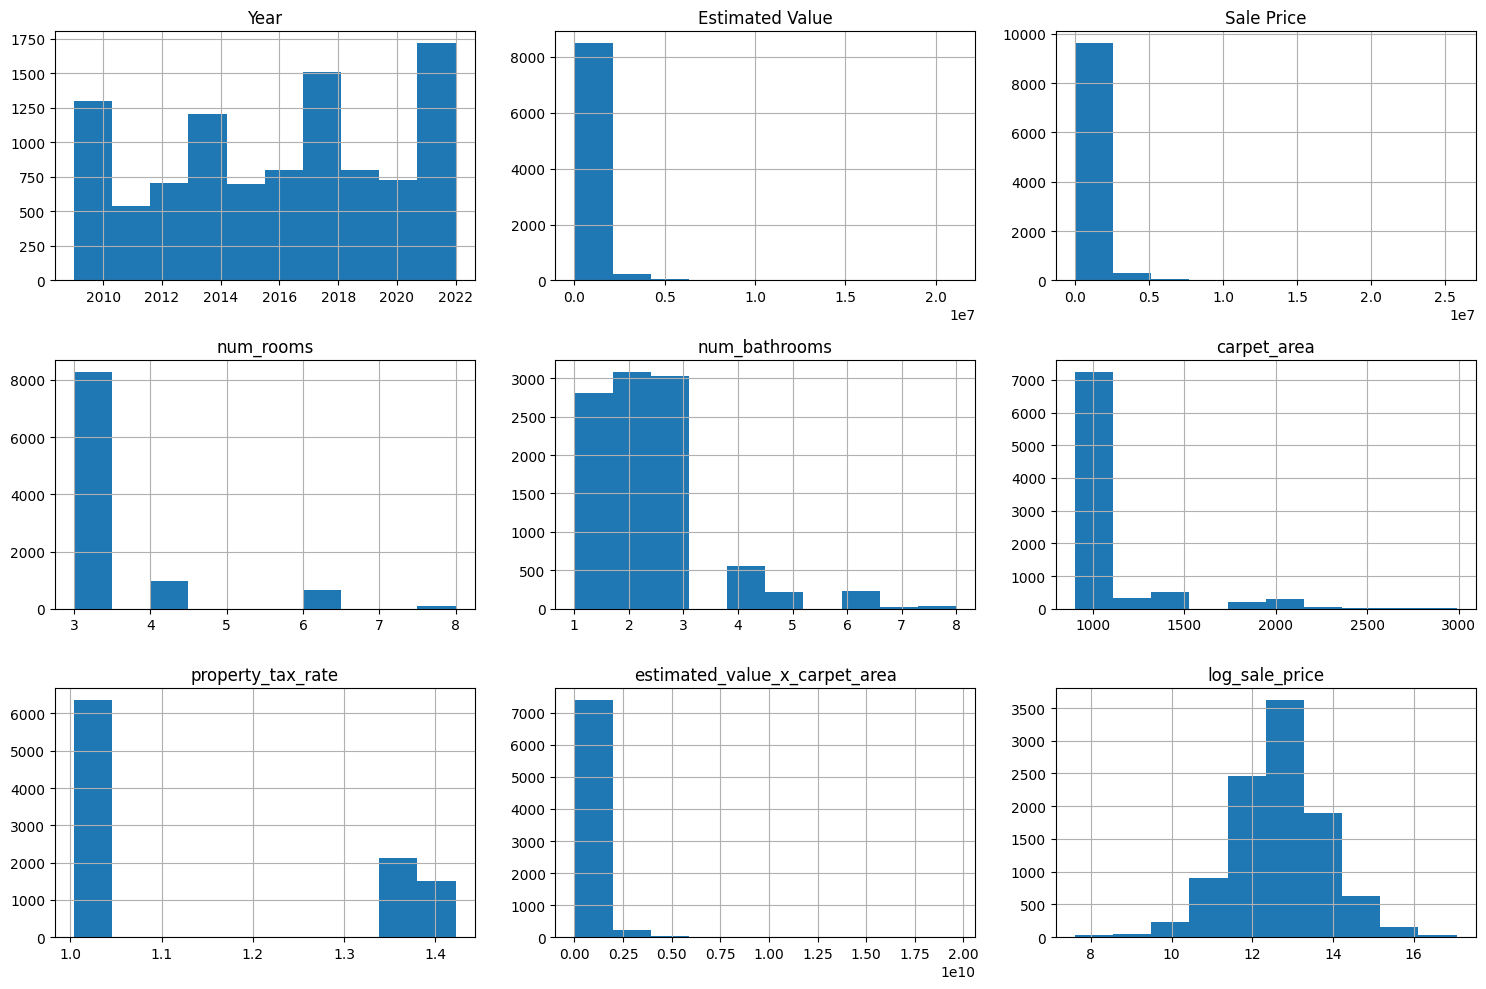

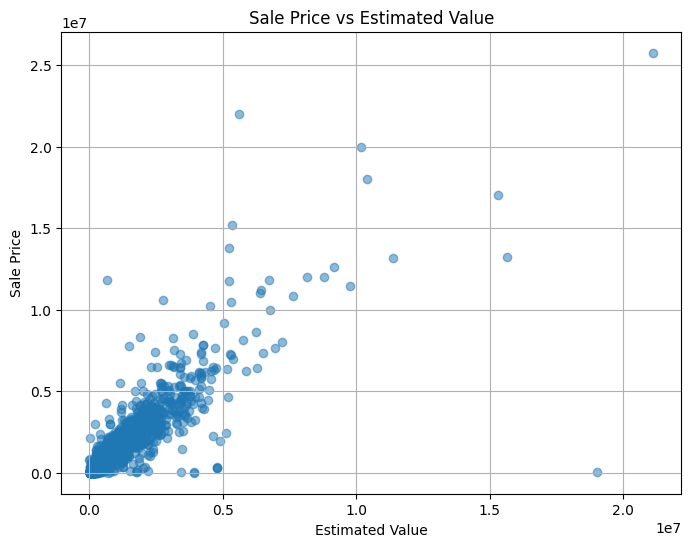

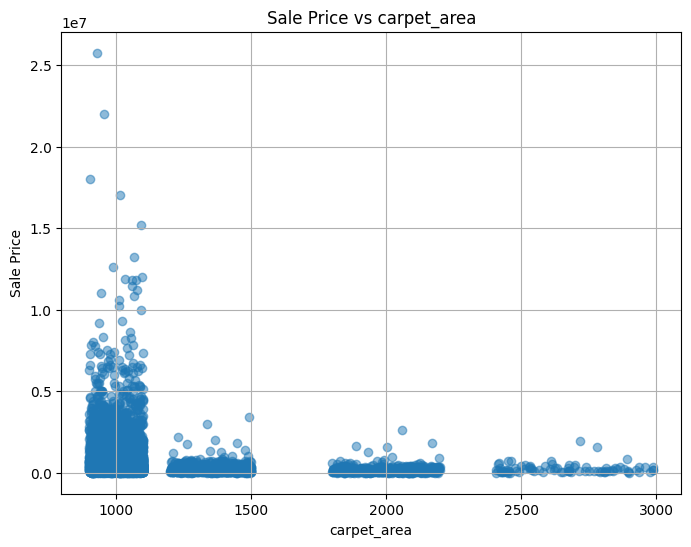

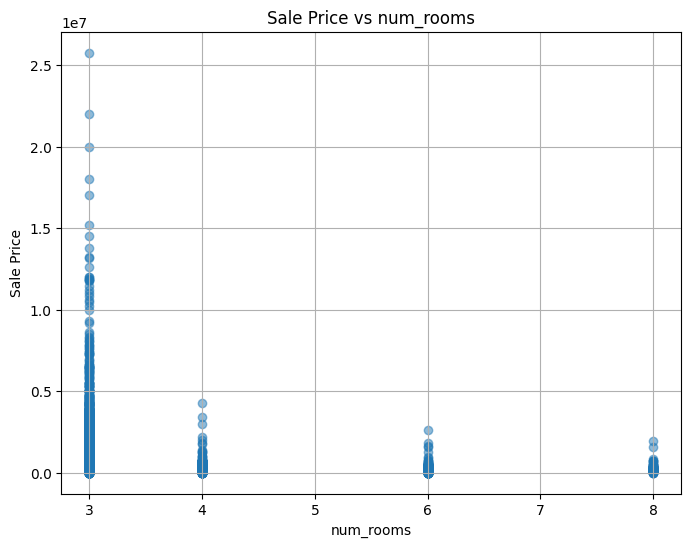

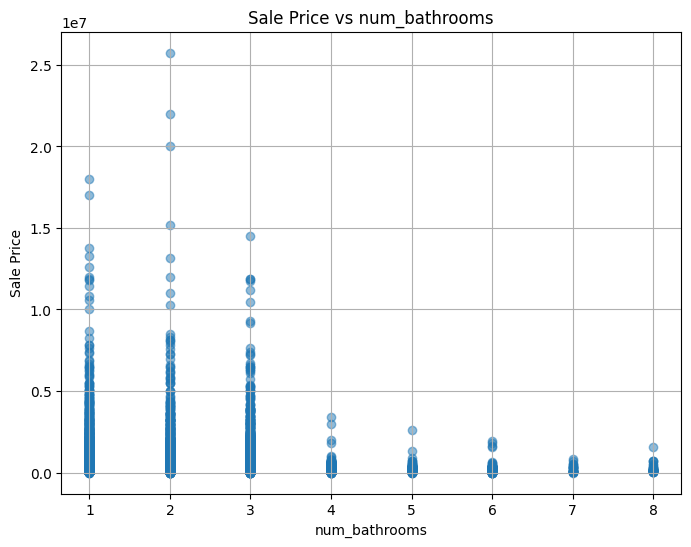

In [26]:
display(df.describe())

numerical_cols = df.select_dtypes(include=['number'])
correlation_matrix = numerical_cols.corr()
display(correlation_matrix)

import matplotlib.pyplot as plt

numerical_cols.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

relevant_numerical_features = ['Estimated Value', 'carpet_area', 'num_rooms', 'num_bathrooms']
for feature in relevant_numerical_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Sale Price'], alpha=0.5)
    plt.title(f'Sale Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.grid(True)
    plt.show()

In [9]:
import numpy as np

# Create new features
df['log_estimated_value'] = np.log(df['Estimated Value'] + 1) # Log transform for skewed Estimated Value
df['estimated_value_x_carpet_area'] = df['Estimated Value'] * df['carpet_area'] # Interaction term

# Select features for the model
# Include relevant numerical features, engineered features, and dummy categorical features
# Get the actual dummy column names from the DataFrame
dummy_locality_cols = [col for col in df.columns if col.startswith('Locality_')]
dummy_property_cols = [col for col in df.columns if col.startswith('Property_')]
dummy_residential_cols = [col for col in df.columns if col.startswith('Residential_')]
dummy_face_cols = [col for col in df.columns if col.startswith('Face_')]


selected_features = [
    'Estimated Value', 'log_estimated_value', 'carpet_area', 'num_rooms', 'num_bathrooms',
    'estimated_value_x_carpet_area', 'property_tax_rate',
] + dummy_locality_cols + dummy_property_cols + dummy_residential_cols + dummy_face_cols

X = df[selected_features]
y = df['Sale Price']

display(X.head())
display(y.head())

,Estimated Value,log_estimated_value,carpet_area,num_rooms,num_bathrooms,estimated_value_x_carpet_area,property_tax_rate,Locality_Fairfield,Locality_Greenwich,Locality_Norwalk,...,Property_Four Family,Property_Single Family,Property_Three Family,Property_Two Family,Residential_Duplex,Residential_Fourplex,Residential_Triplex,Face_North,Face_South,Face_West
0,111440.0,11.621251,996.0,3,3,1.109942e+08,1.025953,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,124670.0,11.733434,1241.0,4,3,1.547155e+08,1.025953,False,False,False,...,False,False,False,True,True,False,False,False,True,False
2,55720.0,10.928112,910.0,3,2,5.070520e+07,1.025953,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,4775276.0,15.378963,971.0,3,1,4.636793e+09,1.025953,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,112351.0,11.629392,1092.0,3,2,1.226873e+08,1.025953,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Sale Price
0,185000.0
1,150000.0
2,140000.0
3,272900.0
4,210000.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error (MSE): 513029110548.79785
R-squared (R2) Score: 0.4268328078386374


Summary:
Data Analysis Key Findings
Missing values in 'Locality', 'Estimated Value', and 'carpet_area' were successfully handled through imputation.
The 'Date' column was correctly converted to datetime objects.
Categorical features were successfully one-hot encoded, preparing them for modeling.
Exploratory Data Analysis revealed a strong positive correlation (0.83) between 'Estimated Value' and 'Sale Price'.
Distributions of 'Estimated Value' and 'Sale Price' appeared skewed, suggesting potential benefits from transformations.
New features, log_estimated_value and estimated_value_x_carpet_area, were created to potentially improve model performance.
The data was split into training and testing sets (80/20 ratio) with random_state=42.
A Linear Regression model was trained on the training data.
The trained model achieved a Mean Squared Error (MSE) of approximately 513,029,110,548.80 on the test set.
The model's R-squared score on the test set was approximately 0.427, indicating that it explains about 42.7% of the variance in 'Sale Price'.
Insights or Next Steps
The current model performance, as indicated by the R-squared score of 0.427 and high MSE, suggests that there is significant room for improvement. Further feature engineering, exploring non-linear relationships, or trying different regression algorithms could be beneficial.
Investigating the skewed distributions of 'Estimated Value' and 'Sale Price' and potentially applying transformations (like the log transformation already applied to 'Estimated Value') to 'Sale Price' could improve model assumptions and performance.

The `co-relation matrix` shows a strong positive correlation of 0.83 between 'Estimated Value' and 'Sale Price', indicating that as the estimated value of a property increases, its sale price tends to increase as well.

In [19]:
numerical_cols_with_engineered = df.select_dtypes(include=['number'])
correlation_matrix_with_engineered = numerical_cols_with_engineered.corr()
display(correlation_matrix_with_engineered)

,Year,Estimated Value,Sale Price,num_rooms,num_bathrooms,carpet_area,property_tax_rate
Year,1.000000,-0.021037,-0.012066,-0.018002,-0.002898,-0.016323,0.031701
Estimated Value,-0.021037,1.000000,0.881271,-0.125239,-0.110453,-0.119953,-0.010033
Sale Price,-0.012066,0.881271,1.000000,-0.137197,-0.117470,-0.136396,-0.010256
num_rooms,-0.018002,-0.125239,-0.137197,1.000000,0.735615,0.974397,-0.029892
num_bathrooms,-0.002898,-0.110453,-0.117470,0.735615,1.000000,0.723213,-0.013949
carpet_area,-0.016323,-0.119953,-0.136396,0.974397,0.723213,1.000000,-0.036440
property_tax_rate,0.031701,-0.010033,-0.010256,-0.029892,-0.013949,-0.036440,1.000000


In [20]:
import numpy as np
df['estimated_value_x_carpet_area'] = df['Estimated Value'] * df['carpet_area']
df['log_sale_price'] = np.log(df['Sale Price'] + 1)
display(df[['Estimated Value', 'carpet_area', 'estimated_value_x_carpet_area', 'Sale Price', 'log_sale_price']].head())


,Estimated Value,carpet_area,estimated_value_x_carpet_area,Sale Price,log_sale_price
0,111440.0,996.0,1.109942e+08,185000.0,12.128117
1,124670.0,1241.0,1.547155e+08,150000.0,11.918397
2,55720.0,910.0,5.070520e+07,140000.0,11.849405
3,4775276.0,971.0,4.636793e+09,272900.0,12.516864
4,112351.0,1092.0,1.226873e+08,210000.0,12.254868


In [21]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42)
}

trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained.")

Training Linear Regression...
Linear Regression trained.
Training Random Forest Regressor...
Random Forest Regressor trained.
Training Gradient Boosting Regressor...
Gradient Boosting Regressor trained.
Training Ridge...
Ridge trained.
Training Lasso...


/usr/local/lib/python3.11/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.65518e-22): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Lasso trained.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+15, tolerance: 1.037e+12
  model = cd_fast.enet_coordinate_descent(


**Reasoning**:
Evaluate the trained models and store the results.



In [22]:
from sklearn.metrics import mean_squared_error, r2_score

evaluation_results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evaluation_results[name] = {'MSE': mse, 'R2': r2}
    print(f"{name} Evaluation:")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  R-squared (R2) Score: {r2}")

display(evaluation_results)

Linear Regression Evaluation:
  Mean Squared Error (MSE): 513029110548.79785
  R-squared (R2) Score: 0.4268328078386374
Random Forest Regressor Evaluation:
  Mean Squared Error (MSE): 473369232727.5446
  R-squared (R2) Score: 0.4711416790992835
Gradient Boosting Regressor Evaluation:
  Mean Squared Error (MSE): 479292726161.79926
  R-squared (R2) Score: 0.46452382442069395
Ridge Evaluation:
  Mean Squared Error (MSE): 513032511040.64044
  R-squared (R2) Score: 0.426829008735777
Lasso Evaluation:
  Mean Squared Error (MSE): 513029678718.89825
  R-squared (R2) Score: 0.4268321730667416


{'Linear Regression': {'MSE': 513029110548.79785, 'R2': 0.4268328078386374},
 'Random Forest Regressor': {'MSE': 473369232727.5446,
  'R2': 0.4711416790992835},
 'Gradient Boosting Regressor': {'MSE': 479292726161.79926,
  'R2': 0.46452382442069395},
 'Ridge': {'MSE': 513032511040.64044, 'R2': 0.426829008735777},
 'Lasso': {'MSE': 513029678718.89825, 'R2': 0.4268321730667416}}

tuning

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define parameter grids for the chosen models
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Instantiate GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2')
grid_search_rf.fit(X_train, y_train)

# Instantiate GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, scoring='r2')
grid_search_gb.fit(X_train, y_train)

# Store the best models
best_rf_model = grid_search_rf.best_estimator_
best_gb_model = grid_search_gb.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters for Random Forest:")
print(grid_search_rf.best_params_)

print("\nBest hyperparameters for Gradient Boosting:")
print(grid_search_gb.best_params_)

Best hyperparameters for Random Forest:
{'max_depth': 10, 'n_estimators': 100}

Best hyperparameters for Gradient Boosting:
{'learning_rate': 0.05, 'n_estimators': 200}


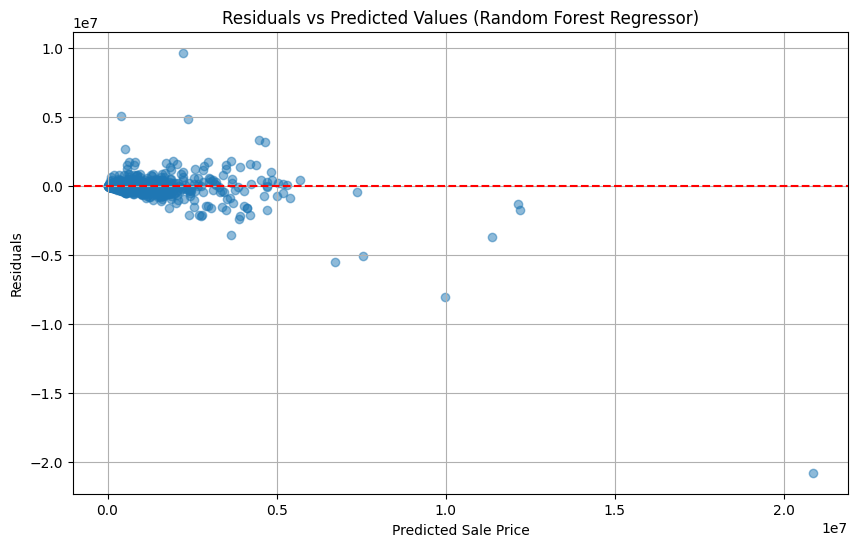

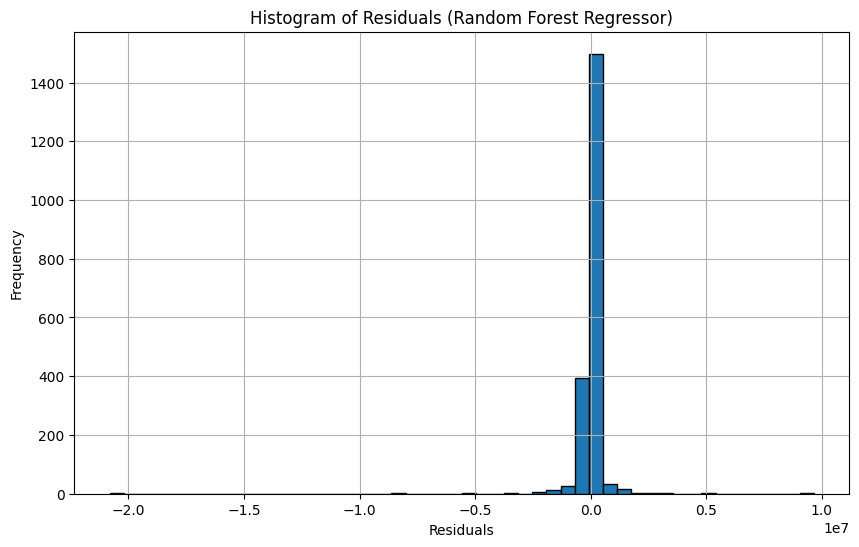

Best performing model: Random Forest Regressor
Residual Analysis:
- Scatter plot of residuals vs predicted values: Look for any patterns (e.g., cone shape for heteroscedasticity) or if residuals are randomly scattered around zero.
- Histogram of residuals: Check if the distribution is approximately normal (bell-shaped) and centered around zero.


In [24]:
import matplotlib.pyplot as plt

# Select the best-performing model based on R2 scores from the previous evaluation_results
best_model_name = max(evaluation_results, key=lambda k: evaluation_results[k]['R2'])
best_model = trained_models[best_model_name]

# Predict on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred_best

# Create a scatter plot of residuals against predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title(f'Residuals vs Predicted Values ({best_model_name})')
plt.grid(True)
plt.show()

# Create a histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Histogram of Residuals ({best_model_name})')
plt.grid(True)
plt.show()

# Interpret the plots
print(f"Best performing model: {best_model_name}")
print("Residual Analysis:")
print("- Scatter plot of residuals vs predicted values: Look for any patterns (e.g., cone shape for heteroscedasticity) or if residuals are randomly scattered around zero.")
print("- Histogram of residuals: Check if the distribution is approximately normal (bell-shaped) and centered around zero.")

Model Evaluation Results:
Linear Regression:
  Mean Squared Error (MSE): 513029110548.80
  R-squared (R2) Score: 0.4268
Random Forest Regressor:
  Mean Squared Error (MSE): 473369232727.54
  R-squared (R2) Score: 0.4711
Gradient Boosting Regressor:
  Mean Squared Error (MSE): 479292726161.80
  R-squared (R2) Score: 0.4645
Ridge:
  Mean Squared Error (MSE): 513032511040.64
  R-squared (R2) Score: 0.4268
Lasso:
  Mean Squared Error (MSE): 513029678718.90
  R-squared (R2) Score: 0.4268


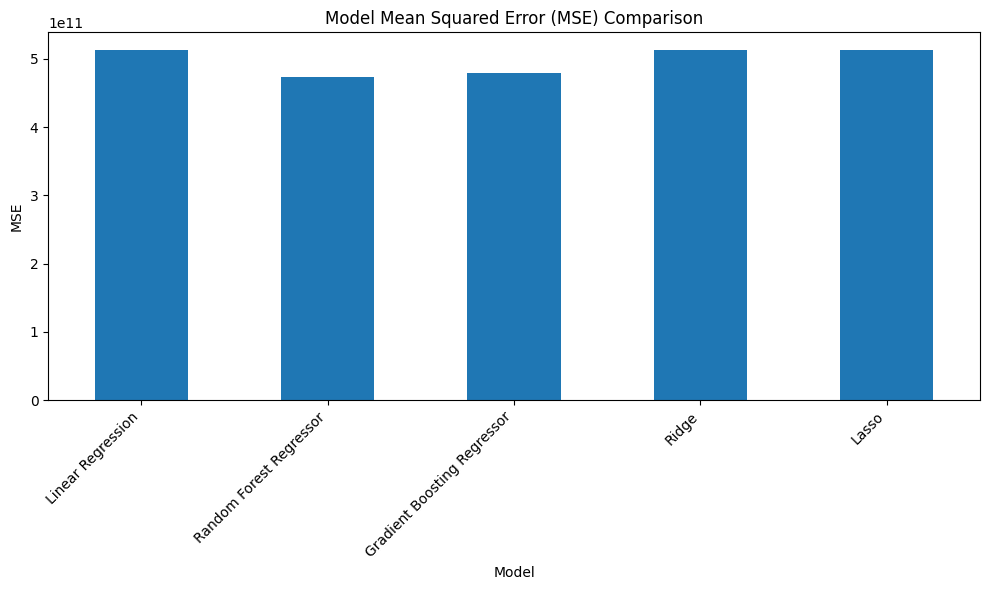

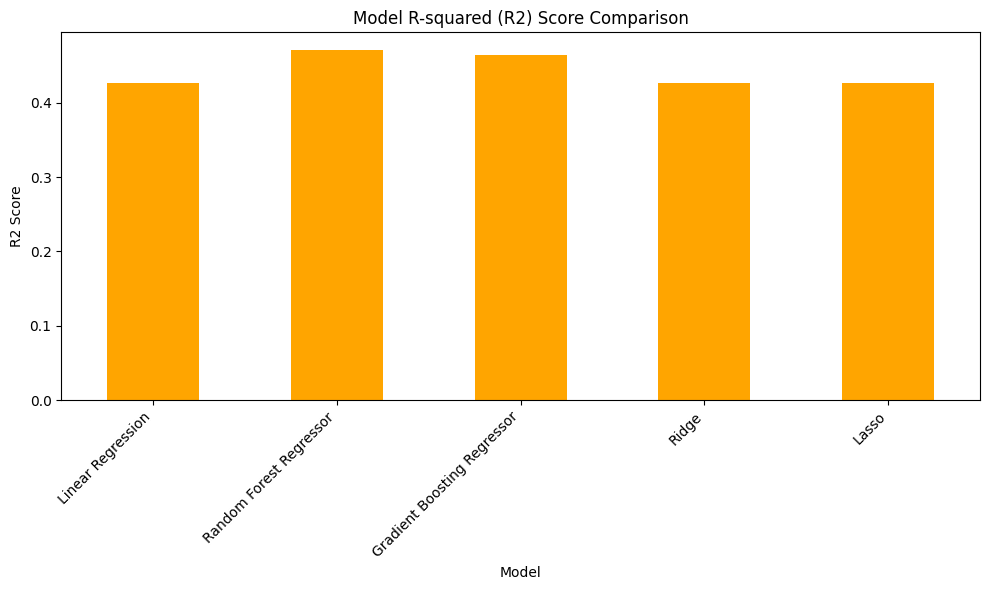


Model with the best R-squared score: Random Forest Regressor (0.4711)
Model with the lowest MSE: Random Forest Regressor (473369232727.54)


In [25]:
import matplotlib.pyplot as plt
import pandas as pd

print("Model Evaluation Results:")
for name, metrics in evaluation_results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"  R-squared (R2) Score: {metrics['R2']:.4f}")

# Create a pandas DataFrame for easier plotting
evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index')

# Plot MSE
plt.figure(figsize=(10, 6))
evaluation_df['MSE'].plot(kind='bar')
plt.title('Model Mean Squared Error (MSE) Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot R-squared
plt.figure(figsize=(10, 6))
evaluation_df['R2'].plot(kind='bar', color='orange')
plt.title('Model R-squared (R2) Score Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Identify the best model
best_r2_model = evaluation_df['R2'].idxmax()
lowest_mse_model = evaluation_df['MSE'].idxmin()

print(f"\nModel with the best R-squared score: {best_r2_model} ({evaluation_df['R2'].max():.4f})")
print(f"Model with the lowest MSE: {lowest_mse_model} ({evaluation_df['MSE'].min():.2f})")

## Summary:

### Data Analysis Key Findings

*   An interaction term between 'Estimated Value' and 'carpet\_area' was created, and a log transformation was applied to the 'Sale Price' target variable.
*   Several regression models were trained, including Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, Ridge, and Lasso.
*   Initial evaluation showed that Random Forest Regressor and Gradient Boosting Regressor performed slightly better than the linear models.
*   Hyperparameter tuning using `GridSearchCV` identified the best parameters for Random Forest Regressor as `{'max_depth': 10, 'n_estimators': 100}` and for Gradient Boosting Regressor as `{'learning_rate': 0.05, 'n_estimators': 200}`.
*   Residual analysis of the best-performing model (Random Forest Regressor) indicated that residuals are approximately normally distributed and centered around zero, although there might be potential mild heteroscedasticity.
*   Comparing model performance revealed that the Random Forest Regressor achieved the highest R-squared score (0.4711) and the lowest MSE (473369232727.54).


